**PANDAS: Un osito cariñosito!**

Pandas es un paquete que nos permite trabajar con archivos de formato definido: CSV, un excel, etc. Además, Pandas proporciona estructuras de datos rápidas, flexibles y expresivas diseñadas para que trabajar con datos "relacionales" o "etiquetados" sea fácil e intuitivo. En criollo Pandas es como en excel, pero super duper!

**Pandas soporta múltipes tipos de datos:**

+ Datos tabulares con columnas de tipo heterogéneo, como en una tabla SQL o en una hoja de cálculo de Excel
+ Datos ordenados y desordenados (no necesariamente frecuencia fija).
+ Datos matriciales arbitrarios (homogéneamente tipados o heterogéneos) con etiquetas de fila y columna
+ Cualquier otra forma de conjuntos de datos observacionales / estadísticos. Los datos en realidad no necesitan ser etiquetados para ser colocados en una estructura de datos de pandas

**Estructuras de datos que maneja:**

- Series (1-dimensional)
- DataFrames (2-dimensional). En otras palabras, DataFrame es una estructura tabular bidimensional de datos tabulares, potencialmente heterogéneos, con ejes etiquetados (filas y columnas). Las operaciones aritméticas se alinean en las etiquetas de fila y columna. Se puede considerar como un contenedor similar a un dict para objetos Serie. La estructura de datos de los pandas primarios. Los DataFrames de pandas proporcionan las mismos tipos de usos y utilidades que los data.frame de R.

Por lo tanto, la serie es la estructura de datos para una sola columna de un DataFrame, no solo conceptualmente, sino literalmente, es decir, los datos en un DataFrame se almacenan realmente en la memoria como una colección de Series.

**Instalación**

Versiones posteriores a Python 2.6 y la distribuciones de Anaconda incluyen el módulo PIP: esta es una herramienta para instalar y gestionar paquetes de Python. Para verificar que tenemos instalado pip podemos hacer:

In [4]:
import pip

Si no tira ningún error, etonces está felizmente instalado. En caso contrario existen diversas formas de instalación desde la consola:

        conda install pip

Una vez instalado pip, podemos instalar fácilemnte pandas desde la consola haciendo:

        pip install pandas
        
Podemos checkear que está instalado haciendo:

In [1]:
#Como veran aqui importamos pandas y al mismo tiempor lo renombramo como 'pd' 
#Asi al llamarlo escribimos menos
import pandas as pd

Mas información: https://pandas.pydata.org/pandas-docs/stable/install.html

**Lectura de Archivos estructurados**

Como ya hemos visto en clase, las proteínas presentan estructura primaria, secundaria, terciaria y cuaternaria. Como hemos visto en clase la estructura de las proteínas se encuentra estrechamente relacionada a la función. Como hemos viste en clase las proteínas pueden tener más de una estructura o conformación posible en solución.
Monod postula, en 1965, la existencia de más de una conformación de la misma proteı́na en pre-equilibrio. Este equilibrio dinámico no es estático, por el contrario la distribución relativa de los distintos confórmeros puede variar por cambios en el entorno proteico (presencia de ligandos, o fluctuaciones de pH, modificaciones postraduccionales, etc). La comparación y el estudio de los cambios que sufre una proteína en dos condiciones dadas, nos puede dar encontece una idea de cómo su estructura se vincula con su función.
Para estimar la diversidad conformacional (es decir como cambia su estructura) de una proteı́na y cuantificarla, debemos comparar estructuralmente sus confórmeros. Para realizar este procedimiento, en primer lugar los confórmeros deben superponerse estructuralmente con el fin de llevar al mismo eje de coordenadas los centro de masas de cada una de las estructuras a comparar. Esto puede hacerse fácilmente dado que los confórmeros comparten la misma secuencia de aminoácidos por lo que para hacer una superposición rı́gida es suficiente un alineamiento secuencial para asignar los residuos equivalentes entre las dos estructuras, seguido de una traslación al mismo centro de masa y una posterior rotación de una de las estructuras. Estas rotaciones se realizan hasta minimizar la distancia cuadrática media (RMSD por sus siglas en inglés de “Root Mean Square Deviation”) entre los átomos equivalentes de las estructuras, y generalmente se utiliza un algoritmo simple de ajuste de mı́nimos cuadrados o “least-squares fitting” (RMSD) para realizar este proceso. Es común que esta superposición sea efectuada tomando como referencia las coordenadas espaciales de un átomo en particular por cada aminoácido, por lo que generalmente se utilizan los C α de la proteı́na.
En la presente práctica vamos a trabajar sobre la comparación de dos estructuras o conformaciones de una proteína, utilizando la medida de RMSD por posición con el software Profit (http://www.bioinf.org.uk/software/profit/), que nos dará una idea de cuál es el comportamiento de dicha proteína.

In [2]:
tabla = pd.read_csv("Ejercicio_III/RMS-res_3SLH_B-3SLH_D.txt", sep="\s+", names=['PosPDB1','Aa1',':','PosPDB2','Aa2','texto','RMSD'])

In [3]:
#Con head mostramos una parte del DataFrame
tabla.head()

,PosPDB1,Aa1,:,PosPDB2,Aa2,texto,RMSD
0,B0,ALA,:,D0,ALA,RMS:,0.700
1,B1,MET,:,D1,MET,RMS:,0.373
2,B2,ASP,:,D2,ASP,RMS:,0.475
3,B3,TYR,:,D3,TYR,RMS:,0.390
4,B4,GLN,:,D4,GLN,RMS:,0.446


Podríamos haber usado pd.read_table(), en general es indistinto, la diferencia radica principalmente en los parámetros por default que se encuentran seteados para la lectura de los archivos:
        - El caracter de separación de columnas para read_cvs es una coma (',') mientras que para read_fwf es una tab ('\t').

**Ambos nos permiten leer el archivo por partes (chunksize) de modo de no saturar la memoria al levantar archivos muy pesados:**

cada chunk nos da un dataFrame con el mismo header.

In [12]:
#Leer un archivo por pedazos
for chunk in pd.read_csv("Ejercicio_III/RMS-res_3SLH_B-3SLH_D.txt", chunksize=4, iterator=True, sep="\s+", names=['PosPDB1','Aa1',':','PosPDB2','Aa2','texto','RMSD']):
    print(chunk["Aa1"].loc[0]) #Con .loc accedemos al valor por row de la columna 'Aa1' en este caso
    print(chunk)

ALA
  PosPDB1  Aa1  : PosPDB2  Aa2 texto   RMSD
0      B0  ALA  :      D0  ALA  RMS:  0.700
1      B1  MET  :      D1  MET  RMS:  0.373
2      B2  ASP  :      D2  ASP  RMS:  0.475
3      B3  TYR  :      D3  TYR  RMS:  0.390
GLN
  PosPDB1  Aa1  : PosPDB2  Aa2 texto   RMSD
0      B4  GLN  :      D4  GLN  RMS:  0.446
1      B5  THR  :      D5  THR  RMS:  0.357
2      B6  ILE  :      D6  ILE  RMS:  0.397
3      B7  PRO  :      D7  PRO  RMS:  0.491
SER
  PosPDB1  Aa1  : PosPDB2  Aa2 texto   RMSD
0      B8  SER  :      D8  SER  RMS:  0.460
1      B9  GLN  :      D9  GLN  RMS:  0.463
2     B10  GLY  :     D10  GLY  RMS:  0.450
3     B11  LEU  :     D11  LEU  RMS:  0.416
SER
  PosPDB1  Aa1  : PosPDB2  Aa2 texto   RMSD
0     B12  SER  :     D12  SER  RMS:  0.477
1     B13  GLY  :     D13  GLY  RMS:  0.454
2     B14  GLU  :     D14  GLU  RMS:  0.301
3     B15  ILE  :     D15  ILE  RMS:  0.069
CYS
  PosPDB1  Aa1  : PosPDB2  Aa2 texto   RMSD
0     B16  CYS  :     D16  CYS  RMS:  0.325
1     B17  V

Mas informacion:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html

http://sdsawtelle.github.io/blog/output/large-data-files-pandas-sqlite.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html

https://stackoverflow.com/questions/31593201/pandas-iloc-vs-ix-vs-loc-explanation

**Podemos quitar las columnas que no sirven:**

In [5]:
del tabla[':']

In [6]:
#Fijense que podemos especificar el numero de row que deseamos qu enos muestre simplemente agregando el numero entre parentesis
#Por default siempre nos muestra el header y 5 rows
tabla.head(2)

,PosPDB1,Aa1,PosPDB2,Aa2,texto,RMSD
0,B1,MET,D1,MET,RMS:,0.373
1,B2,ASP,D2,ASP,RMS:,0.475


In [7]:
del tabla['texto']

In [8]:
tabla.head(4)

,PosPDB1,Aa1,PosPDB2,Aa2,RMSD
0,B1,MET,D1,MET,0.373
1,B2,ASP,D2,ASP,0.475
2,B3,TYR,D3,TYR,0.390
3,B4,GLN,D4,GLN,0.446


**Podriamos por ejemplo tomar ciertos intervalos de caracteres en el texto para deteriminar las columnas:**

In [4]:
import pandas as pd
tabla = pd.read_fwf("~/Descargas/Workshop_leloir_2018/Ejercicio_III/RMS-res_3SLH_B-3SLH_D.txt", colspecs=[(3,9),(9,12),(19,25),(25,28),(38,44)], names=['PosPDB1','Aa1','PosPDB2','Aa2','RMSD'])
tabla.head()

,PosPDB1,Aa1,PosPDB2,Aa2,RMSD
0,B0,ALA,D0,ALA,0.700
1,B1,MET,D1,MET,0.373
2,B2,ASP,D2,ASP,0.475
3,B3,TYR,D3,TYR,0.390
4,B4,GLN,D4,GLN,0.446


**Operando con las columnas**

+ Accedemos a cada columna haciendo df['nombre de la columna'] (donde df es el nombre génerico para designar DataFrame, en nuestro caso por ejemplo hacemos:
``` python
tabla['nombre de la columna']
```
**¿Podés imprimir la columna de los RMSD de nuestra tabla?**

+ Cada columna de un DataFrame es una serie de datos al que podemos acceder como una lista:
``` python
df['columna'].tolist()
```
**Extrae la columna de los residuos de la estructura 1 como una lista y guardala en una variable denominada 'residuos':**

+ Podemos conocer la longitud de nuestro DataFrame utiizando la misma función len() que hemos visto para listas y strings:
``` python
len(df)
```
**¿Cuál es la longitud de las secuencias?**

+ Podemos operar con las columnas con los mismo operadores relacionales y matemáticos que ya hemos visto:
``` python
df['columna'] * 2
df['columna'] + 2
df['columna'] > 2  
```          
**¿Qué nos dá en el último caso?**

+ Podemos crear una nueva columna tomando una lista de datos del mismo tamño que nuestro dataFrame o una columna modificada:
``` python
df['columna nueva'] = df['columna'] * 2
```
**¿Podrías generar una columna cuyo valor sea el doble del valor del RMSD?**

+ Los operadores tambien nos sirven para filtrar nuestro dataFrame:
``` python
df[df['columna'] > 0.2 ]
```          
**¿Podrías mostrar solo las lineas que corresponden a LYS?**

+ Como ya vimos podemos acceder al valor de una celda haciendo:
``` python
df['nombre de la columna'].loc[0]
```                
**¿Podrías ahora mostrar los valores de RMSD de las lineas correspondientes al filtro aplicado anteriormente?**

+ Podemos concatenar dataFrames haciendo:

``` python
 nuevo_df = pd.concat([df1,df2])
```
**¿Podrías generar un dataFrame que solo contenga la información de la tabla para las posiciones correspondientes a LYS y ARG?**

+ Podemos, también, extraer las columnas que tiene un string dado:
             

``` python
df[df['columna'].str.contains("string")]         
```
**Filtra la tabla original para quedarte con la linea correspondiente a la posicion 301**                

Pandas nos permite hacer una estadistica básica de nuestros dartos:

In [3]:
tabla.describe()

,RMSD
count,435.000000
mean,0.329632
std,0.171118
min,0.009000
25%,0.210000
50%,0.313000
75%,0.417500
max,0.969000


In [4]:
tabla['RMSD'].mean()

0.329632183908046

In [5]:
tabla['RMSD'].median()

0.313

In [6]:
tabla['RMSD'].max()

0.96900000000000008

####EJERCICIO PRÁCTICO
Agregar una columna nueva a la tabla que contenga el número de posición, extraído de la columna 'PosPDB1'.

**Solución Propuesta**
``` python 
tabla['Position'] = tabla['PosPDB1'].str.replace('B','')
tabla['Position'] = tabla['Position'].convert_objects(convert_numeric=True) 
```

**Así mismo nos permite hacer algunos gráficos (no muy lindos). Por ejemplo podemos graficar la distribución de los RMSD:**

/home/usuario/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/usuario/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


Populating the interactive namespace from numpy and matplotlib


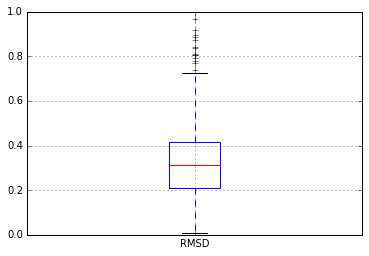

In [2]:
import matplotlib.pyplot as plt 
#Esto nos permite ver el grafico aqui mismo y no en una ventana extra
%pylab inline
plt.figure()
tabla.boxplot('RMSD')
plt.show()

**Si quisieramos guardar el gráfico en un archivo debemos cambiar el plt.show() por:**

``` python
        plt.savefig('path_hacia_donde_lo_queremos/plot.png')
```
                
                
**Pandas nos permite agrupar los datos de nuestro dataFrame en base a los valores de una columna: por ejemplo si generamos una columna 'control' donde checkeamos si los residuos de esa posición son LYS o no, podemos saber la media de RMSD de las LYS respecto de las de los demas aminoácidos **

In [26]:
tabla['control'] = tabla['Aa1'] == 'LYS'
tabla.head(2)

,PosPDB1,Aa1,PosPDB2,Aa2,RMSD,control
0,B0,ALA,D0,ALA,0.700,False
1,B1,MET,D1,MET,0.373,False


In [27]:
tabla['RMSD'].groupby([tabla['control']]).mean()

control
False    0.32632
True     0.39835
Name: RMSD, dtype: float64

##Si hay pobreza, que no se note! /Trabajando con faltante de datos
Cuando nustras tablas tienen faltantes de datos Pandas nos permite trabajar facilmente con ello. Salgamos un poco de nuestro ejemplo concreto y usemo un ejemplo genérico:

In [12]:
import numpy as np
#Creamos una tabla con valores numéricos al azar, con 5 rows (a,c,e,f y h) y 3 columnas (one, two, three)
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'],columns=['one', 'two', 'three'])

In [14]:
#Aqui reindexamos la tabla de modo que ahora nos quedan datos faltantes
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2

,one,two,three
a,-1.681454,1.627598,0.787799
b,NaN,NaN,NaN
c,0.915813,0.122507,0.208089
d,NaN,NaN,NaN
e,-0.164543,0.568801,-0.756741
f,-0.296720,-1.371453,0.442910
g,NaN,NaN,NaN
h,0.756895,-0.626999,0.466716


Como vemos los datos faltantes Pandas los muestra como 'NaN'. Debemos tener en cuenta que:
        - Al sumar datos, los valores NA (faltantes) se tratarán como cero
        - Si los datos son todos NA, el resultado será NA
        - Los métodos como cumsum y cumprod ignoran los valores de NA, pero los preservan en las matrices resultantes
        - Al agrupar sobre un DataFrame que contiene valores NA (con GroupBy), estos se excluyen automáticamente
        
**¿Cuál es el valor promedio de los valores de la columna 'one'?**

De todos modos Pandas cuenta con una función qu enos permite rellenar los valores missing con lo que deseemos (puede ser un int como 0 o un string como 'ND'). Por ejemplo podemos rellenar con ceros las celdas faltantes:

``` python
        df2.fillna(0)
```

**Rellená los valores missing con ND y filtrá el DataFrame de modo que solo se vean las lineas con datos**

##Graficos bien cool!

Seaborn es una librería que nos permite hacer todo tipo de gráficos, muy pero muy lindos. Lo mejor de todo es que se complementa con Pandas y nos permite graficar nuestro DataFrame sin reestructuración previa de los datos.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
matplotlib.style.use('ggplot')

/home/usuario/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
:0: FutureWarning: IPython widgets are experimental and may change in the future.


Populating the interactive namespace from numpy and matplotlib


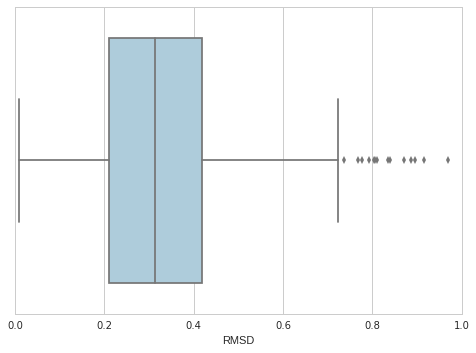

In [18]:
#Con set podemos elegir el estilo del grafico y las paletas
sns.set(style="whitegrid", palette="Paired")
sns.boxplot(tabla["RMSD"])

**Seaborn posee estilos o temas predeterminados, así como paletas de colores. De todos modos los colores de matplot pueden ser utilizados.**

Codigos de colores: https://matplotlib.org/examples/color/named_colors.html

Paletas de seaborn: https://seaborn.pydata.org/tutorial/color_palettes.html

Estilos de seaborn: https://seaborn.pydata.org/tutorial/aesthetics.html

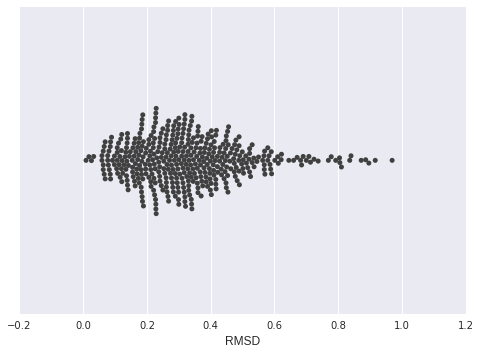

In [20]:
sns.despine(left=True) 
#Seteamos la paleta de colores y el estilo
sns.set(style="darkgrid")
ax = sns.swarmplot(x="RMSD", data=tabla, color=".25")
#Podemos setear el tamaño de letra de 
ax.set_xlabel('RMSD', fontsize=12)

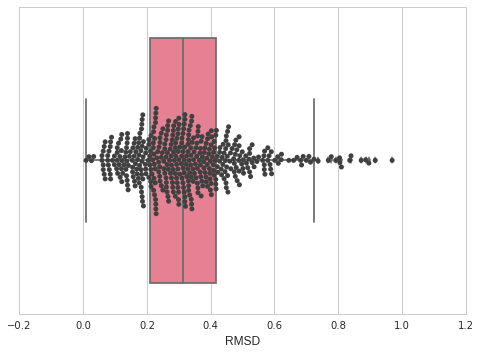

In [23]:
sns.despine(left=True) 
sns.set(style="whitegrid", palette="husl")
ax = sns.boxplot(x="RMSD", data=tabla)
ax = sns.swarmplot(x="RMSD", data=tabla, color=".25")
#Podemos setear el tamaño de letra de 
ax.set_xlabel('RMSD', fontsize=12)

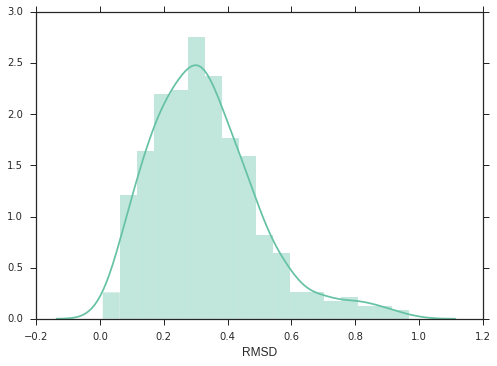

In [14]:
sns.despine(left=True) 
sns.set(style="ticks", palette="Set2")
ax = sns.distplot(tabla["RMSD"])
#Podemos setear el tamaño de letra de 
ax.set_xlabel('RMSD', fontsize=12)

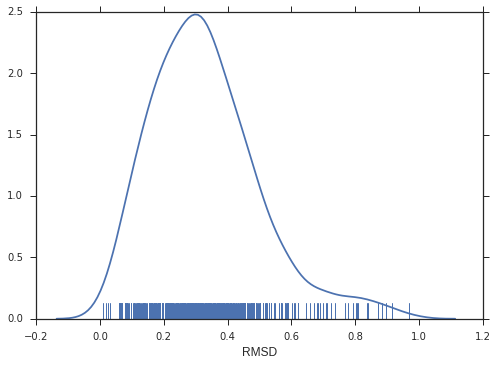

In [9]:
sns.despine(left=True) 
sns.set(style="ticks", palette="deep")
ax = sns.distplot(tabla.RMSD, rug=True, hist=False)
#Podemos setear el tamaño de letra de 
ax.set_xlabel('RMSD', fontsize=12)

**¿Te animás aseparar el dataFrame en dos 'LYS' y el resto y graficar  estas dos poblaciones?**